In [1]:
!pip install lightgbm

^C


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import norm
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\Food_Delivery_Times.csv")
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [6]:
print(f'Number of duplicates in this dataset: {df.duplicated().sum()}')

Number of duplicates in this dataset: 0


In [7]:
for i in df:
    if df[i].isnull().sum()>0:
        print(f'{i} has: {df[i].isnull().sum()} missing values')

Weather has: 30 missing values
Traffic_Level has: 30 missing values
Time_of_Day has: 30 missing values
Courier_Experience_yrs has: 30 missing values


In [8]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [9]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

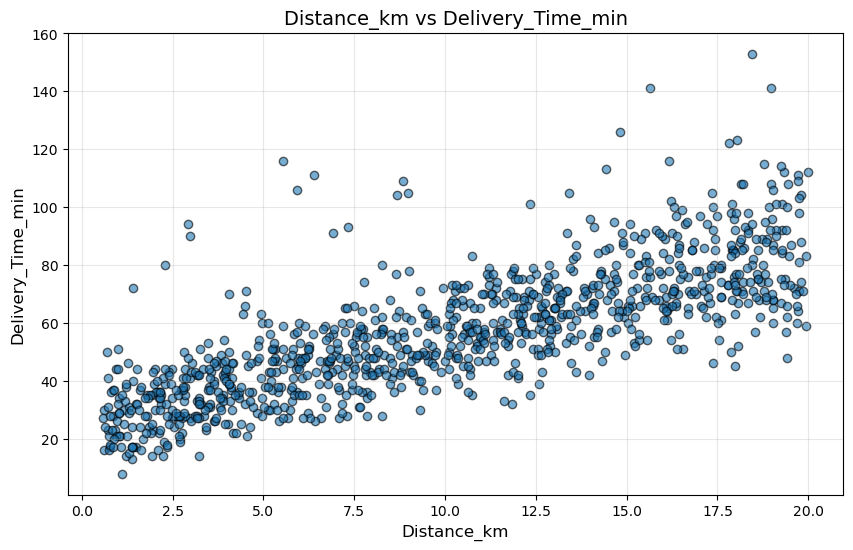

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Distance_km"], df["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Distance_km vs Delivery_Time_min", fontsize=14)
plt.xlabel("Distance_km", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

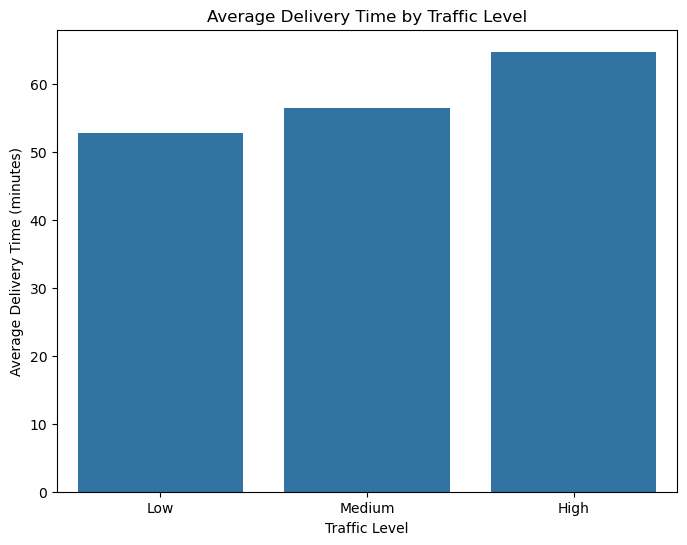

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=df, errorbar=None)
plt.title("Average Delivery Time by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

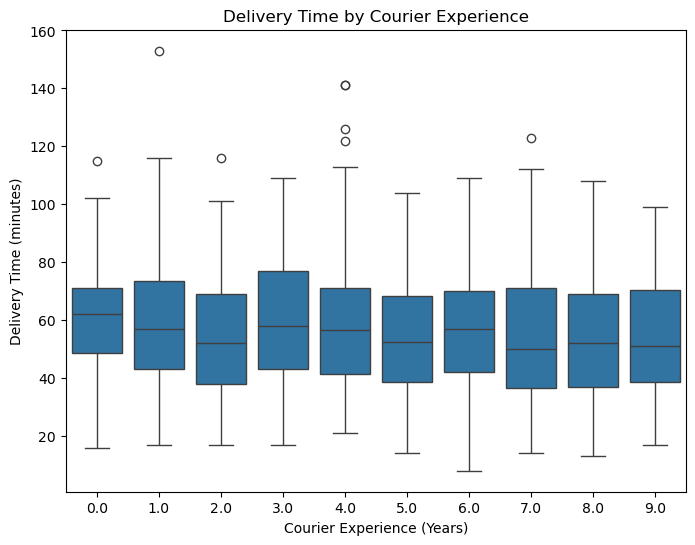

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df)
plt.title("Delivery Time by Courier Experience")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

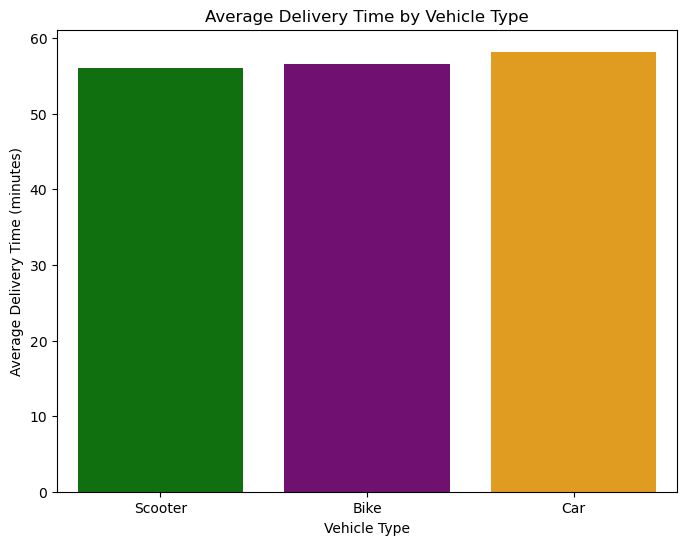

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', data=df, errorbar=None, hue='Vehicle_Type', palette = {'Scooter': "green", 'Bike': "purple", 'Car': 'orange'})
plt.title("Average Delivery Time by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

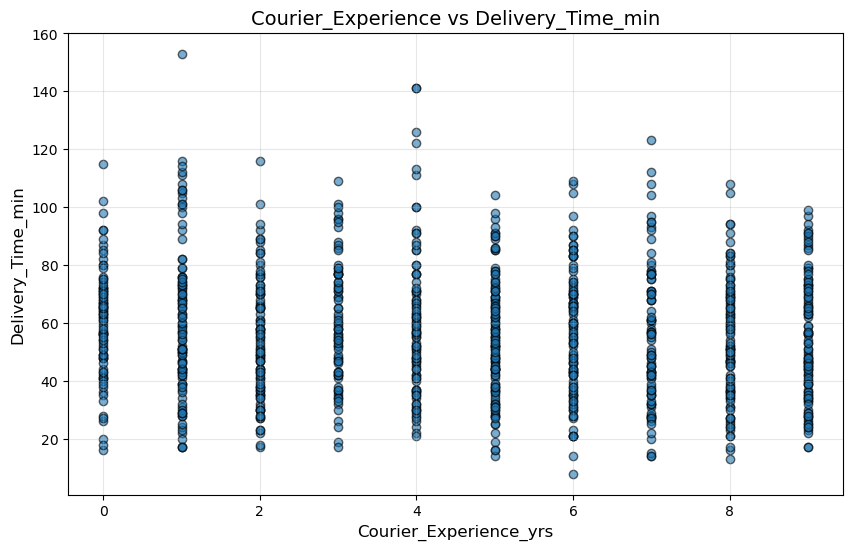

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Courier_Experience_yrs"], df["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Courier_Experience vs Delivery_Time_min", fontsize=14)
plt.xlabel("Courier_Experience_yrs", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

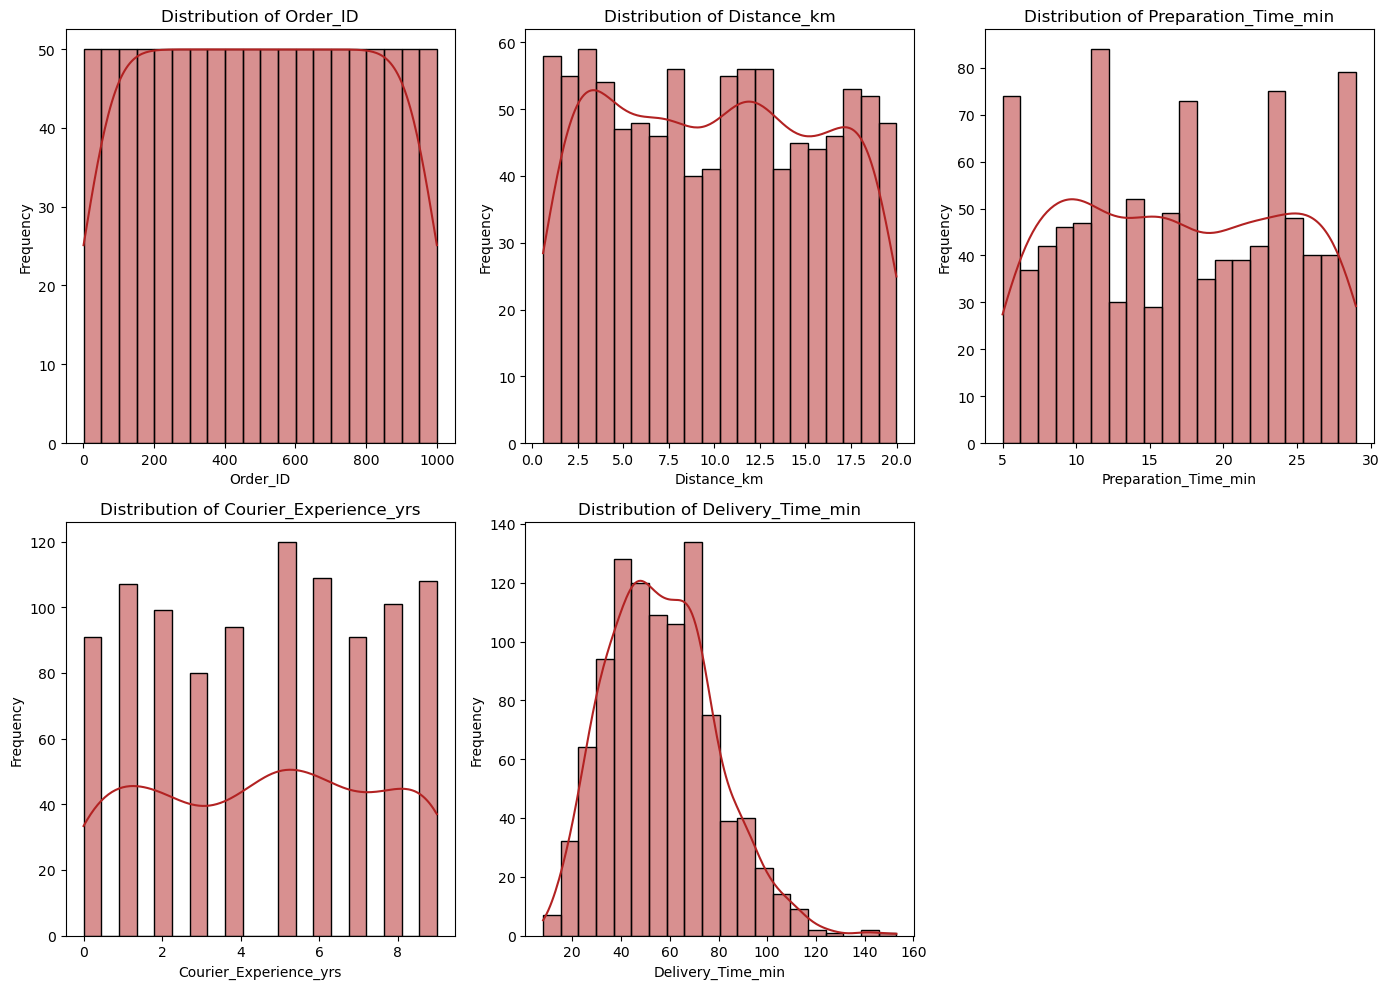

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='firebrick')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

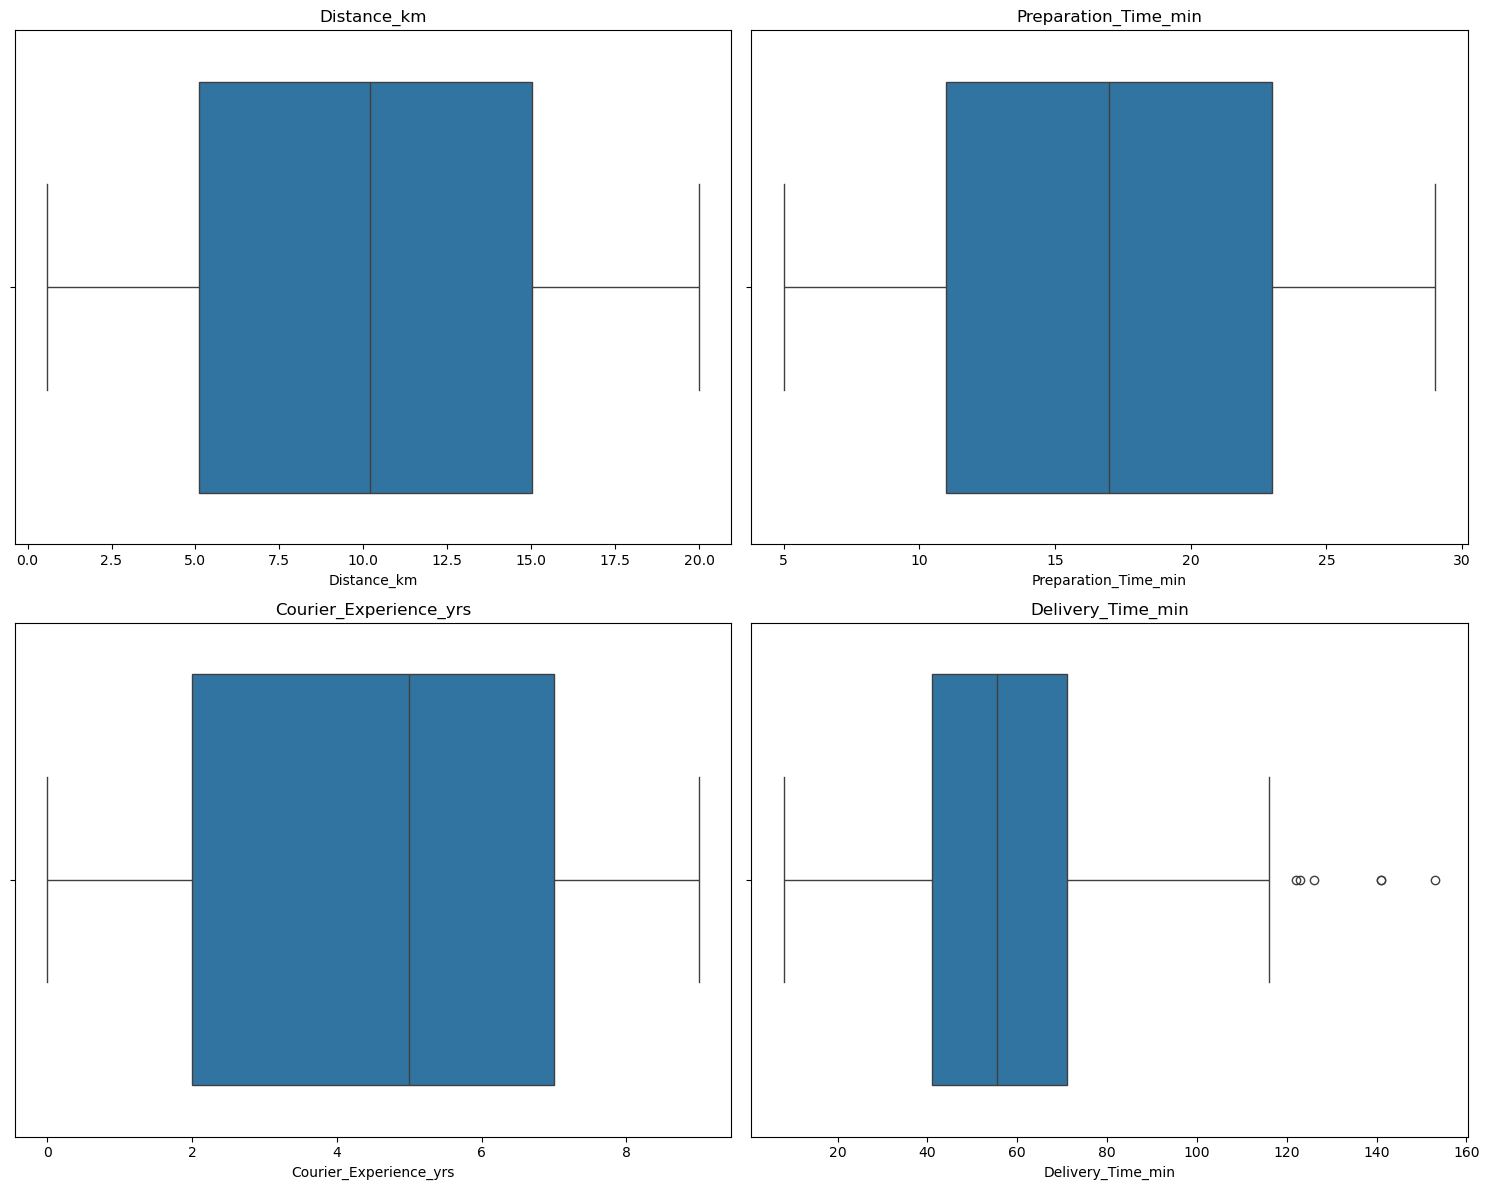

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x=df['Distance_km'], ax=axes[0, 0])
axes[0, 0].set_title('Distance_km')

sns.boxplot(x=df['Preparation_Time_min'], ax=axes[0, 1])
axes[0, 1].set_title('Preparation_Time_min')

sns.boxplot(x=df['Courier_Experience_yrs'], ax=axes[1, 0])
axes[1, 0].set_title('Courier_Experience_yrs')

sns.boxplot(x=df['Delivery_Time_min'], ax=axes[1, 1])
axes[1, 1].set_title('Delivery_Time_min')

plt.tight_layout()
plt.show()

                        Order_ID  Distance_km  Preparation_Time_min  \
Order_ID                1.000000    -0.023792             -0.035362   
Distance_km            -0.023792     1.000000             -0.009025   
Preparation_Time_min   -0.035362    -0.009025              1.000000   
Courier_Experience_yrs  0.012912    -0.005951             -0.031124   
Delivery_Time_min      -0.033831     0.816535              0.305535   

                        Courier_Experience_yrs  Delivery_Time_min  
Order_ID                              0.012912          -0.033831  
Distance_km                          -0.005951           0.816535  
Preparation_Time_min                 -0.031124           0.305535  
Courier_Experience_yrs                1.000000          -0.085540  
Delivery_Time_min                    -0.085540           1.000000  


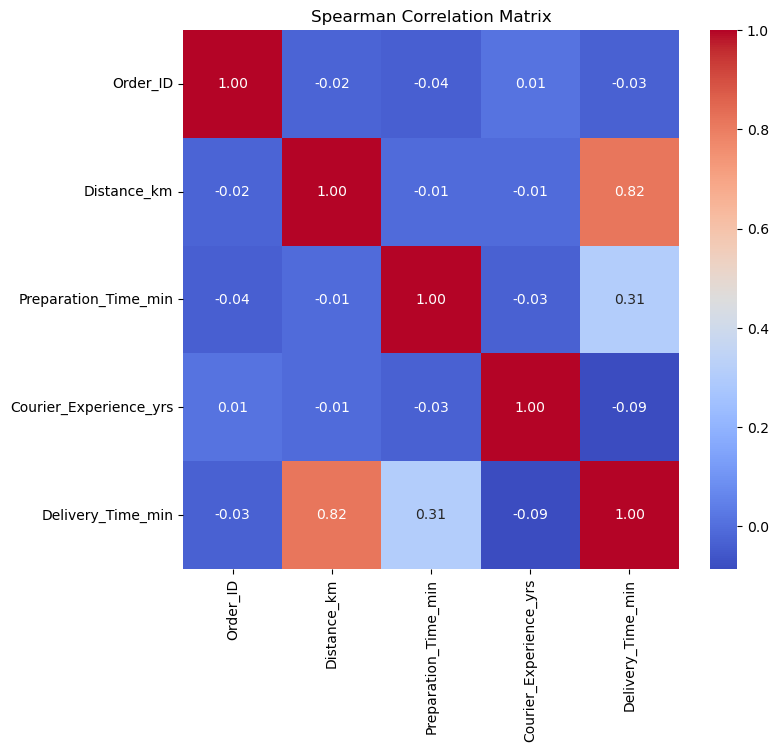

In [17]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

# Выводим матрицу корреляции
print(spearman_corr)

# Построение тепловой карты для визуализации матрицы корреляции
plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [18]:
df["Delivery_Speed_km_per_min"] = df.apply(
    lambda row: row["Distance_km"] / row["Delivery_Time_min"] 
    if row["Delivery_Time_min"] > 0 else 0,
    axis=1)

In [19]:
df = pd.get_dummies(df, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)

In [20]:
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Delivery_Speed_km_per_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,0.184419,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,0.195476,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,0.161356,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,0.201081,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,0.279853,False,False,False,False,True,False,False,True,False,False,False


In [21]:
df.shape

(1000, 17)

In [22]:
X = df.drop(['Order_ID', 'Delivery_Time_min'], axis = 1)
y = df['Delivery_Time_min']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=250) 


In [24]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

param_xgb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]    
}

grid_search__xgb = GridSearchCV(xgb_regressor, param_xgb, cv=5)

grid_search__xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [25]:
grid_search__xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [26]:
best_gs_xgb_two = grid_search__xgb.best_estimator_

In [27]:
y_test_pred1 = best_gs_xgb_two.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred1)

print('Score on train data = ', round(best_gs_xgb_two.score(X_train, y_train), 4))
print('Score on test data = ', round(best_gs_xgb_two.score(X_test, y_test), 4))
print('MAE on test data =', round(mae_test, 4))

Score on train data =  0.9993
Score on test data =  0.9893
MAE on test data = 1.5618


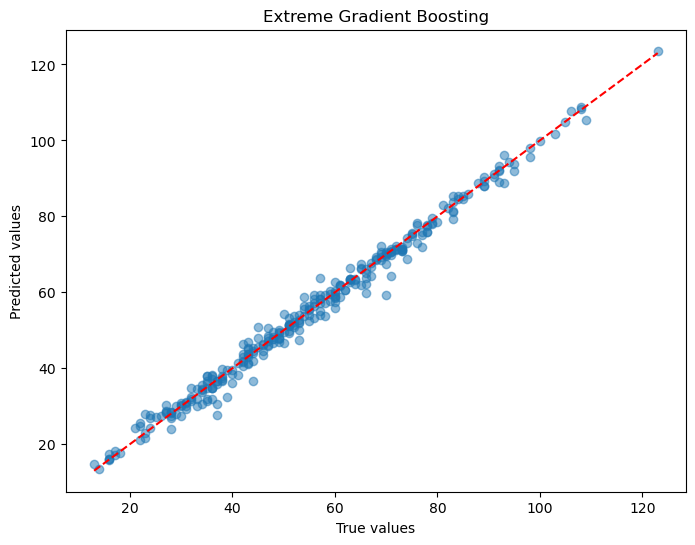

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred1, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Extreme Gradient Boosting')
plt.show()

In [29]:
lgb_regressor = lgb.LGBMRegressor(objective='regression', metric='mae', verbose=-1)

param_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
}

grid_search_lgb = GridSearchCV(lgb_regressor, param_lgb, cv=5, scoring='neg_mean_absolute_error')

grid_search_lgb.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=LGBMRegressor(metric='mae', objective='regression',
                                     verbose=-1),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 10], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50, 100], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [30]:
print('Best params:', grid_search_lgb.best_params_)

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}


In [31]:
best_lgb = grid_search_lgb.best_estimator_

In [32]:
y_test_pred2 = best_lgb.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred2)

print('Score on train data:', round(best_lgb.score(X_train, y_train), 4))
print('Score on test data:', round(best_lgb.score(X_test, y_test), 4))
print('MAE on test data:', round(mae_test, 4))

Score on train data: 0.9933
Score on test data: 0.9827
MAE on test data: 2.1485


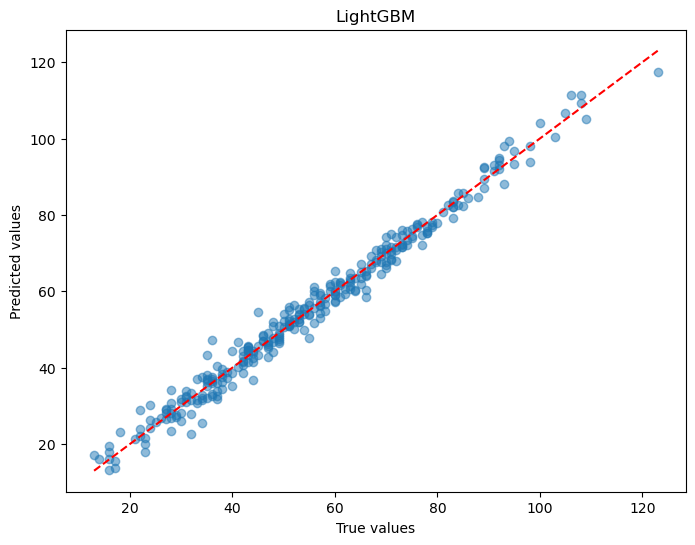

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LightGBM')
plt.show()